<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/stats/pathos-this-year-last-year-comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.visualcrossing.com/weather/weather-data-services#

In [1]:
# check data

from datetime import datetime, timedelta

# Calculate the date for 'yesterday' in UTC
yesterday = datetime.utcnow() - timedelta(days=1)
yesterday_str = yesterday.strftime('%Y-%m-%dT%H:%M:%SZ')

# Calculate the date for '10 days before yesterday' in UTC
tendays = yesterday - timedelta(days=10)
tendays_str = tendays.strftime('%Y-%m-%dT%H:%M:%SZ')

# Calculate the date for '1 year before yesterday' in UTC
lastyearyesterday = yesterday - timedelta(days=365)
lastyearyesterday_str = lastyearyesterday.strftime('%Y-%m-%dT%H:%M:%SZ')

# Calculate the date for '10 days before 1 year before yesterday' in UTC
lastyeartendays = lastyearyesterday - timedelta(days=10)
lastyeartendays_str = lastyeartendays.strftime('%Y-%m-%dT%H:%M:%SZ')

# Print the results


In [2]:

paphos="34.68,32.61"

sc="33.46242581990894,-79.13561525981794"



prompt = "1"

if prompt == "1":
  location=paphos
  filestr = "paphos"
  unitgroup = "metric"
else:
  location=sc
  filestr = "sc"
  unitgroup = "us"


apikey="ET2UEWPH7KFHT289DDMPTQJFV"


In [3]:
print("last year, last")
print("1 year before Yesterday (UTC):", lastyearyesterday_str)
print("10 days before 1 year before Yesterday (UTC):", lastyearyesterday_str)

date1=lastyeartendays_str
date2=lastyearyesterday_str

url='https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{0}/{1}/{2}?key={3}&include=hours&contentType=csv&unitGroup={4}'.format(location,date1,date2,apikey,unitgroup)

import requests

headers = {'Accept': 'text/csv'}


# Send the GET request
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Save the content to a CSV file
    with open(filestr + ".csv", 'wb') as file:
        file.write(response.content)
    print("CSV file downloaded and saved as ", filestr + ".csv")
else:
    print(f"Failed to retrieve the CSV file. Status code: {response.status_code}")





1 year before Yesterday (UTC): 2023-08-13T04:32:03Z
10 days before 1 year before Yesterday (UTC): 2023-08-13T04:32:03Z
CSV file downloaded and saved as  paphos.csv


In [4]:
import pandas as pd

df=pd.read_csv(filestr + ".csv",usecols=['datetime','temp','feelslike','humidity'],parse_dates=['datetime'])


df.set_index('datetime', inplace=True)
df=df.between_time('08:00', '18:00')

last=df


In [5]:
print("this year, now")

print("Yesterday (UTC):", yesterday_str)
print("10 days before Yesterday (UTC):", tendays_str)

date1=tendays_str
date2=yesterday_str

url='https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{0}/{1}/{2}?key={3}&include=hours&contentType=csv&unitGroup={4}'.format(location,date1,date2,apikey,unitgroup)

import requests

headers = {'Accept': 'text/csv'}


# Send the GET request
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Save the content to a CSV file
    with open(filestr + ".csv", 'wb') as file:
        file.write(response.content)
    print("CSV file downloaded and saved as ", filestr + ".csv")
else:
    print(f"Failed to retrieve the CSV file. Status code: {response.status_code}")

Yesterday (UTC): 2024-08-12T04:32:03Z
10 days before Yesterday (UTC): 2024-08-02T04:32:03Z
CSV file downloaded and saved as  paphos.csv


In [6]:
import pandas as pd

df=pd.read_csv(filestr + ".csv",usecols=['datetime','temp','feelslike','humidity'],parse_dates=['datetime'])


df.set_index('datetime', inplace=True)
df=df.between_time('08:00', '18:00')

now=df


In [7]:
now['match'] = now.index.strftime('%m-%d %H:%M')
last['match'] = last.index.strftime('%m-%d %H:%M')


intersection = pd.merge(now, last, on='match', how='inner')

In [8]:
intersection

,temp_x,feelslike_x,humidity_x,match,temp_y,feelslike_y,humidity_y
0,28.8,31.8,67.43,08-03 08:00,28.0,28.9,54.94
1,29.5,33.3,67.47,08-03 09:00,29.6,34.1,69.62
2,29.9,33.9,66.41,08-03 10:00,30.0,34.9,69.33
3,30.0,33.3,62.28,08-03 11:00,31.0,36.4,66.12
4,30.9,35.0,61.73,08-03 12:00,31.0,36.6,66.18
...,...,...,...,...,...,...,...
105,32.8,42.8,69.71,08-12 14:00,31.1,35.5,61.53
106,32.9,43.2,69.74,08-12 15:00,31.1,34.7,58.43
107,32.0,41.7,73.79,08-12 16:00,31.0,35.2,61.55
108,31.1,40.7,78.73,08-12 17:00,31.1,34.7,58.54


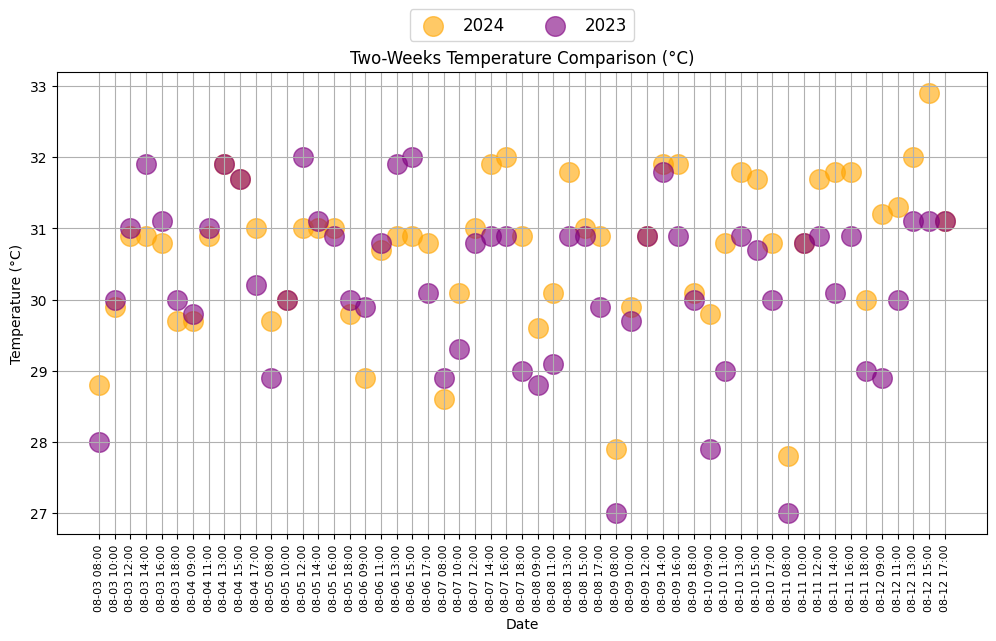

In [11]:
import matplotlib.pyplot as plt


df=intersection.iloc[::2, :]

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
ax.scatter(df['match'], df['temp_x'], s=200, alpha=0.6, color="orange", label='2024')
ax.scatter(df['match'], df['temp_y'], s=200, alpha=0.6, color="purple", label='2023')

# Set the x-axis label
ax.set_xlabel('Date')

# Set the y-axis label
ax.set_ylabel('Temperature (°C)')

# Rotate x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)
plt.xticks(fontsize=8)

# Set the title
plt.title('Two-Weeks Temperature Comparison (°C)')

# Add legend
legend = plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=2, fontsize=12)

plt.grid()

# Show the plot
plt.show()


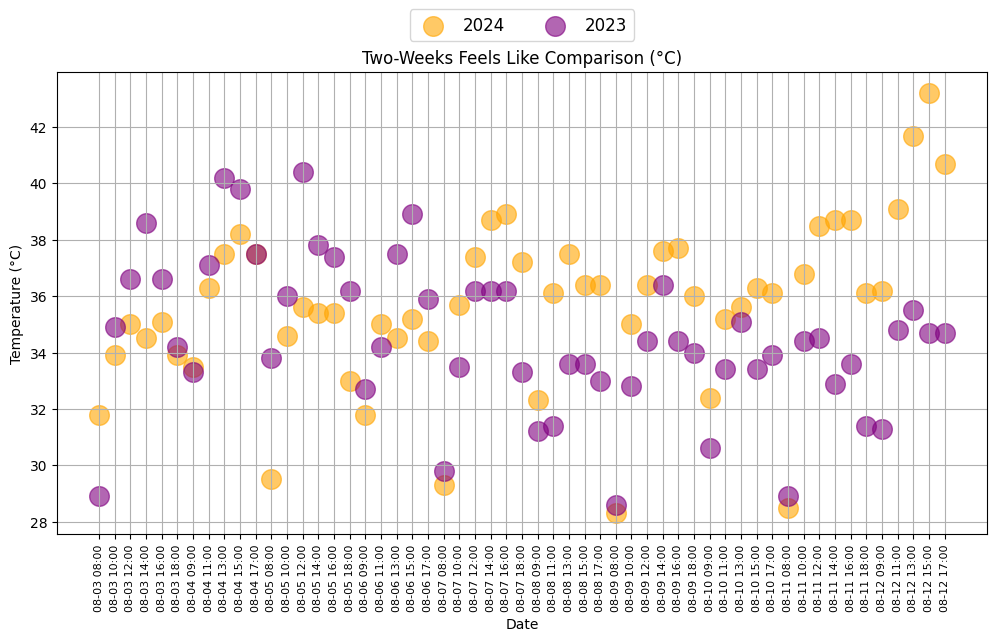

In [25]:
import matplotlib.pyplot as plt


df=intersection.iloc[::2, :]

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
ax.scatter(df['match'], df['feelslike_x'], s=200, alpha=0.6, color="orange", label='2024')
ax.scatter(df['match'], df['feelslike_y'], s=200, alpha=0.6, color="purple", label='2023')

# Set the x-axis label
ax.set_xlabel('Date')

# Set the y-axis label
ax.set_ylabel('Temperature (°C)')

# Rotate x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)
plt.xticks(fontsize=8)

# Set the title
plt.title('Two-Weeks Feels Like Comparison (°C)')

# Add legend
legend = plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=2, fontsize=12)

plt.grid()

# Show the plot
plt.show()


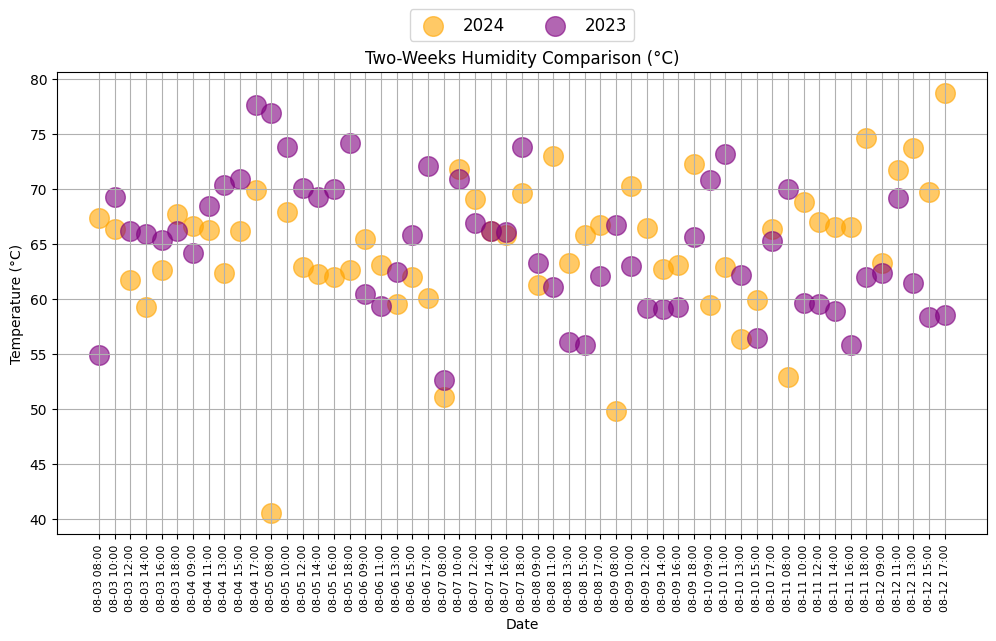

In [26]:
import matplotlib.pyplot as plt


df=intersection.iloc[::2, :]

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
ax.scatter(df['match'], df['humidity_x'], s=200, alpha=0.6, color="orange", label='2024')
ax.scatter(df['match'], df['humidity_y'], s=200, alpha=0.6, color="purple", label='2023')

# Set the x-axis label
ax.set_xlabel('Date')

# Set the y-axis label
ax.set_ylabel('Temperature (°C)')

# Rotate x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)
plt.xticks(fontsize=8)

# Set the title
plt.title('Two-Weeks Humidity Comparison (°C)')

# Add legend
legend = plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=2, fontsize=12)

plt.grid()

# Show the plot
plt.show()